This project is about a bike rental shop. we want to predict the demand of bikes at any given hour of the day, so that, we can arrange for sufficient number of bike for the customers.

Our task is to create a machine learning model which can predict the count of bikes rented at a given hour of the day.

### Data description
The business meaning of each column in the data is as below

* season: The current season (1:winter, 2:spring, 3:summer, 4:fall)
* yr: year (0: 2011, 1:2012)
* mnth: month ( 1 to 12)
* hr: hour of the day (0 to 23)
* holiday: whether day is holiday or not
* weekday: day of the week
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0
* weathersit: The Weather forecast for the day
* * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: Normalized temperature in Celsius.
* atemp: Normalized feeling temperature in Celsius.
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

# problem statement:
Creating a ML model which can predict the number of bikes which will be rented at a given hour of the day
* Target Variable: cnt
* Predictors: holiday, weather, registered users etc.

### 1. Reading Data into Python


In [1]:

import pandas as pd
import numpy as np
BikeRentalData=pd.read_csv('BikeRentalData.csv')
print('Shape before deleting duplicate values:', BikeRentalData.shape)


BikeRentalData=BikeRentalData.drop_duplicates()
print('Shape After deleting duplicate values:', BikeRentalData.shape)

BikeRentalData.head()

Shape before deleting duplicate values: (17379, 14)
Shape After deleting duplicate values: (17377, 14)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [2]:
# Printing last five records
BikeRentalData.tail()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,48,61
17378,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,37,49


#  Type of Machine Learning
we need to create a supervised ML Regression model, as the target variable is Continuous.

<AxesSubplot:>

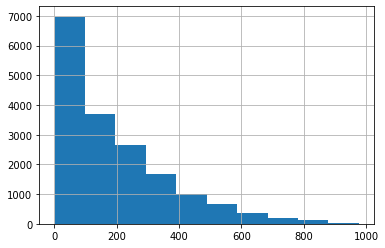

In [3]:
%matplotlib inline


BikeRentalData['cnt'].hist()

### 5. Initial look at data 

In [4]:
import pandas_profiling
prof=pandas_profiling.ProfileReport(BikeRentalData)
prof.to_file(output_file='BikeRentalData_EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
BikeRentalData.shape

(17377, 14)

In [6]:
BikeRentalData.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
registered      int64
cnt             int64
dtype: object

In [7]:
BikeRentalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   yr          17377 non-null  int64  
 2   mnth        17377 non-null  int64  
 3   hr          17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weathersit  17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  hum         17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  registered  17377 non-null  int64  
 13  cnt         17377 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


In [8]:
# Looking at the descriptive statistics of numeric data
BikeRentalData.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [9]:
pd.set_option('precision', 2)
BikeRentalData.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.00,17377.0,17377.00,17377.00,17377.00,17377.00,17377.00,17377.00,17377.00,17377.00,17377.00,17377.00,17377.00,17377.00
mean,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,153.80,189.48
std,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,151.36,181.39
min,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,1.00
25%,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,34.00,40.00
50%,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,115.00,142.00
75%,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,220.00,281.00
max,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,886.00,977.00


In [10]:
# unique values for each column
# TO understand which column is categorical and which one is Continuous
BikeRentalData.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

### 6. Removing useless columns

In [11]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['yr']
BikeRentalData = BikeRentalData.drop(UselessColumns,axis=1)
BikeRentalData.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.29,0.81,0.0,13,16
1,1,1,1,0,6,0,1,0.22,0.27,0.80,0.0,32,40
2,1,1,2,0,6,0,1,0.22,0.27,0.80,0.0,27,32
3,1,1,3,0,6,0,1,0.24,0.29,0.75,0.0,10,13
4,1,1,4,0,6,0,1,0.24,0.29,0.75,0.0,1,1


### 7. Missing Values Treatment

Missing values are treated for each column separately.


In [12]:
BikeRentalData.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

In [13]:
BikeRentalData.isnull().sum(axis=1).loc[:10]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

### 8. EDA-Univariate Analysis-Graphs for one variable
Categorical variable: Bar chart

Continuous variable: Histogram

In [14]:

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    

    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

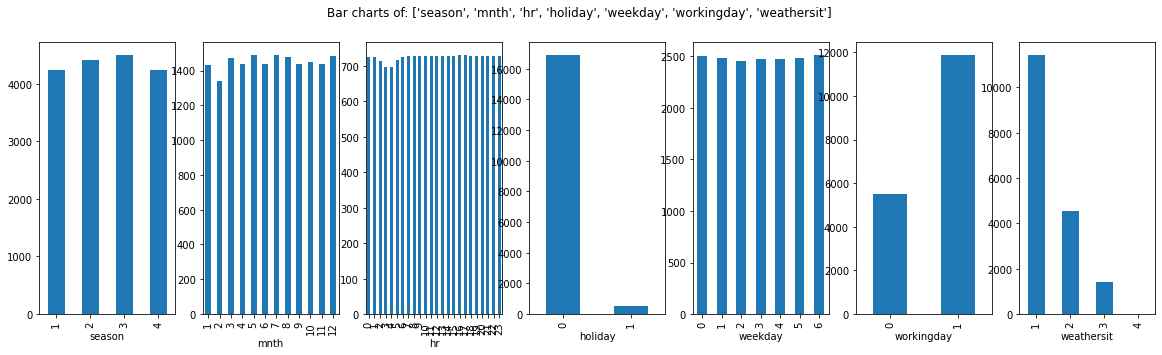

In [15]:
# Calling the function
PlotBarCharts(inpData=BikeRentalData, colsToPlot=[
    'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'registered'}>, <AxesSubplot:>]],
      dtype=object)

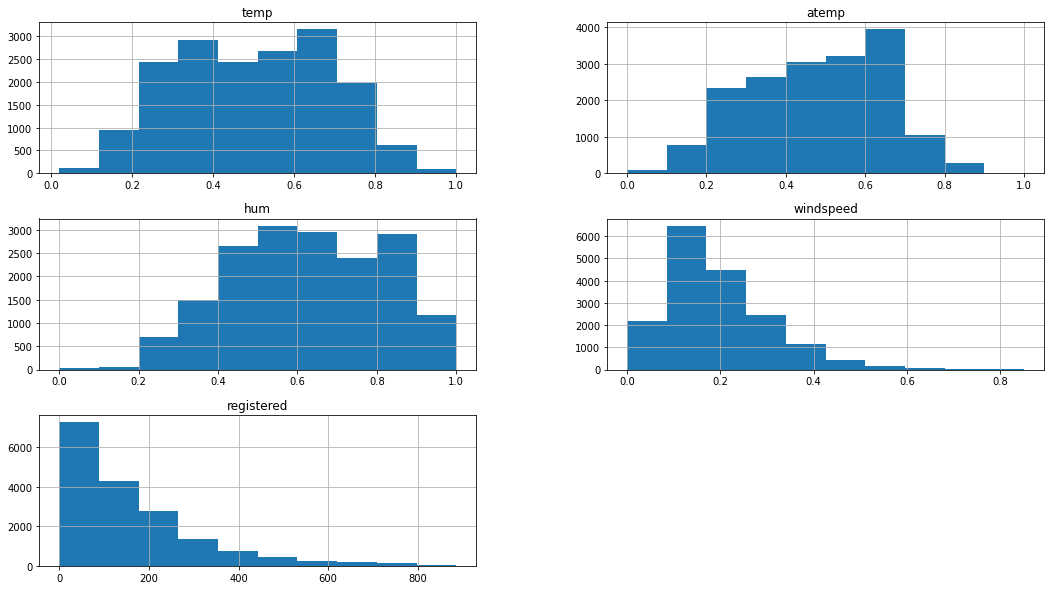

In [16]:
# Plotting histograms of multiple columns together
BikeRentalData.hist(['temp','atemp','hum','windspeed','registered'], figsize=(18,10))

<AxesSubplot:>

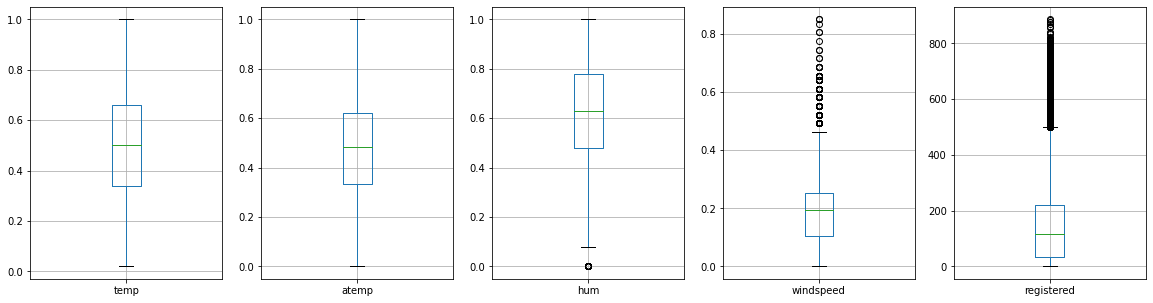

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, subPlot=plt.subplots(nrows=1, ncols=5,figsize=(20,5))

BikeRentalData.boxplot('temp',ax=subPlot[0])
BikeRentalData.boxplot('atemp',ax=subPlot[1])
BikeRentalData.boxplot('hum',ax=subPlot[2])
BikeRentalData.boxplot('windspeed',ax=subPlot[3])
BikeRentalData.boxplot('registered',ax=subPlot[4])

In [18]:
import numpy as np

numeric_cols=['temp','atemp','hum','windspeed','registered']
for col in numeric_cols:
    v=BikeRentalData[col]
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(BikeRentalData)[0]
    print("Column %s's outliers =%d (%.2f%%)" % (col, np.shape(v_col)[0], perc))

Column temp's outliers =0 (0.00%)
Column atemp's outliers =0 (0.00%)
Column hum's outliers =22 (0.13%)
Column windspeed's outliers =342 (1.97%)
Column registered's outliers =683 (3.93%)


###  EDA-Bivariate Analysis


The Target variable is Continuous, hence below two scenarios will be present

Continuous Target Variable Vs Continuous Predictor

Continuous Target Variable Vs Categorical Predictor

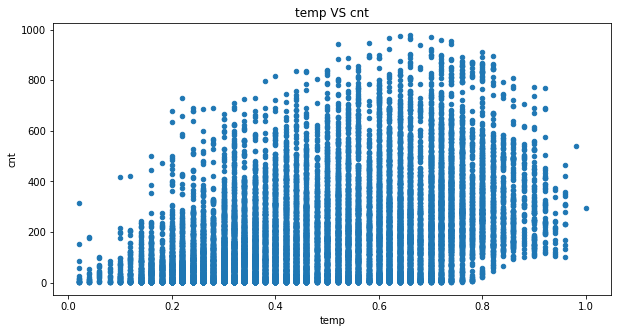

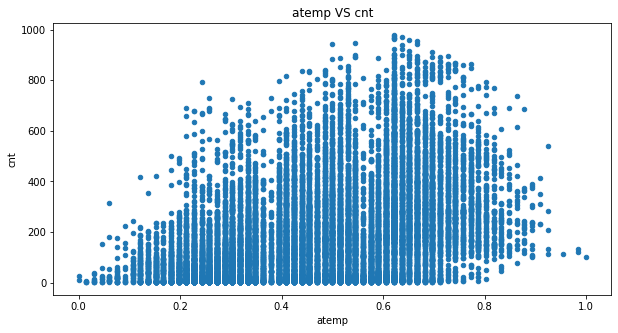

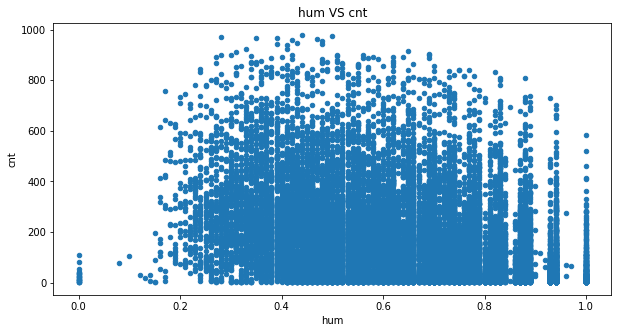

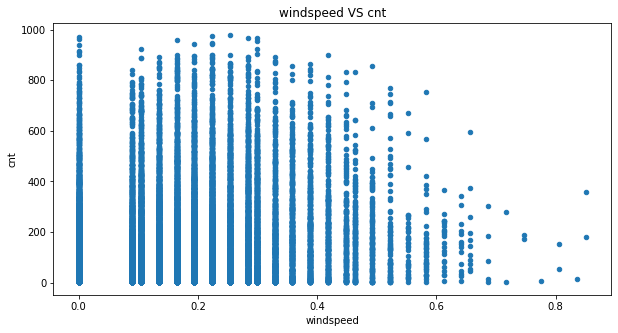

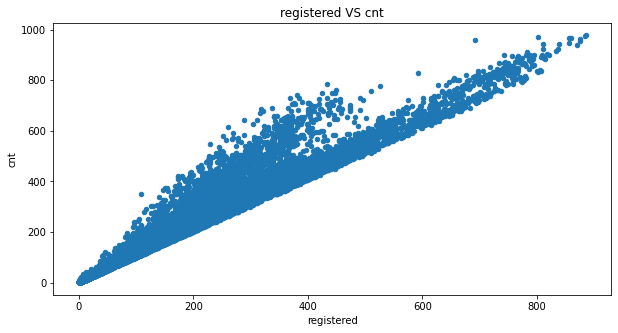

In [19]:
ContinuousCols=['temp','atemp','hum','windspeed','registered']

for predictor in ContinuousCols:
    BikeRentalData.plot.scatter(x=predictor, y='cnt', figsize=(10,5), title=predictor+" VS "+ 'cnt')

In [20]:

ContinuousCols=['cnt','temp','atemp','hum','windspeed','registered']

CorrelationData=BikeRentalData[ContinuousCols].corr()
CorrelationData

,cnt,temp,atemp,hum,windspeed,registered
cnt,1.00,0.40,0.40,-0.32,0.09,0.97
temp,0.40,1.00,0.99,-0.07,-0.02,0.34
atemp,0.40,0.99,1.00,-0.05,-0.06,0.33
hum,-0.32,-0.07,-0.05,1.00,-0.29,-0.27
windspeed,0.09,-0.02,-0.06,-0.29,1.00,0.08
registered,0.97,0.34,0.33,-0.27,0.08,1.00


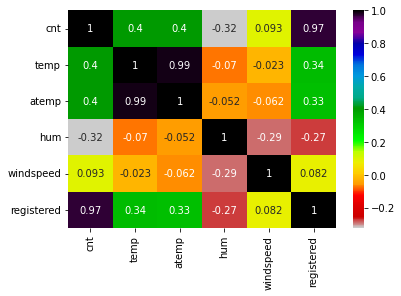

In [21]:
import seaborn as sns
axes = sns.heatmap(CorrelationData, annot=True,cmap='nipy_spectral_r')

In [22]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable

CorrelationData['cnt'][abs(CorrelationData['cnt']) > 0.5 ]

cnt           1.00
registered    0.97
Name: cnt, dtype: float64

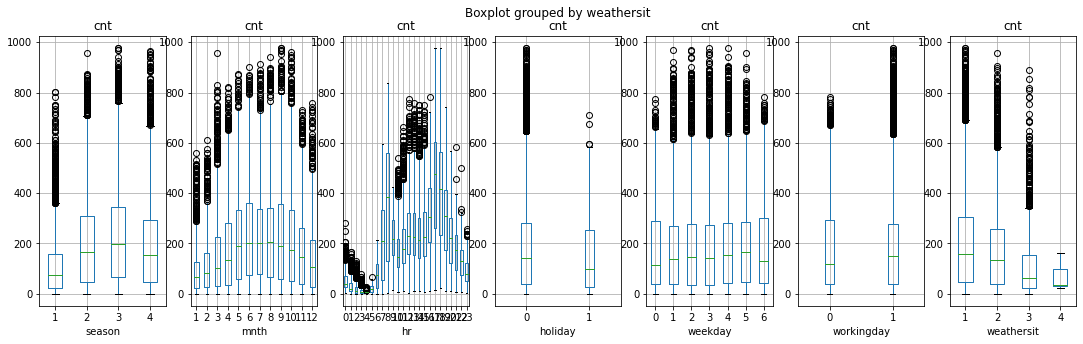

In [23]:

CategoricalColsList=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BikeRentalData.boxplot(column='cnt', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])



all the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables 
* ANOVA Test result: Probability of H0 being true

In [24]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [25]:

CategoricalPredictorList=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
FunctionAnova(inpData=BikeRentalData, 
              TargetVariable='cnt', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

season is correlated with cnt | P-Value: 5.106220835895279e-257
mnth is correlated with cnt | P-Value: 5.2484657372432516e-284
hr is correlated with cnt | P-Value: 0.0
holiday is correlated with cnt | P-Value: 4.495359698010671e-05
weekday is correlated with cnt | P-Value: 0.0018766923121991564
workingday is correlated with cnt | P-Value: 6.675147740900618e-05
weathersit is correlated with cnt | P-Value: 1.4485803474430875e-81


['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

### 10. Selecting final dataset for ML

In [26]:
SelectedColumns=['registered','season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


DataForML=BikeRentalData[SelectedColumns]
DataForML.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit
0,13,1,1,0,0,6,0,1
1,32,1,1,1,0,6,0,1
2,27,1,1,2,0,6,0,1
3,10,1,1,3,0,6,0,1
4,1,1,1,4,0,6,0,1


In [27]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

### 11. Data Pre-processing 

there is no Ordinal categorical variable which is in string format.

All the binary nominal variables are already in numeric format

In [28]:
DataForML_Numeric=pd.get_dummies(DataForML)

DataForML_Numeric['cnt']=BikeRentalData['cnt']

DataForML_Numeric.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,13,1,1,0,0,6,0,1,16
1,32,1,1,1,0,6,0,1,40
2,27,1,1,2,0,6,0,1,32
3,10,1,1,3,0,6,0,1,13
4,1,1,1,4,0,6,0,1,1


###  Splitting the data into Training and Testing 

In [ ]:
DataForML_Numeric.columns

In [30]:
TargetVariable='cnt'
Predictors=['registered', 'season', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

###  Multiple Linear Regression

In [31]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

print(RegModel)

LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)


from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

n
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9574652818603429

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  379         426.0
1  237         242.0
2  343         254.0
3  181         175.0
4   98          97.0
Mean Accuracy on test data: 32.8077951553925
Median Accuracy on test data: 86.57805462946716

Accuracy values for 10-fold Cross Validation:
 [-74.07929873  26.65796421  59.00921878  49.87501303  14.90766055
  13.94538914  48.55944791  69.51846121  69.73312601  39.90684357]

Final Average Accuracy of the model: 31.8


In [32]:
TestingDataResults

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt,Predictedcnt,APE
0,368,3,8,7,0,5,1,1,379,426.0,12.40
1,211,2,4,7,0,3,1,1,237,242.0,2.11
2,188,3,8,16,0,6,0,3,343,254.0,25.95
3,122,2,6,8,0,0,0,1,181,175.0,3.31
4,76,3,8,22,0,1,1,1,98,97.0,1.02
...,...,...,...,...,...,...,...,...,...,...,...
5209,106,2,6,11,0,3,1,1,134,122.0,8.96
5210,253,3,8,17,0,0,0,1,398,336.0,15.58
5211,99,4,12,10,0,2,1,1,102,115.0,12.75
5212,49,3,9,8,0,0,0,1,70,91.0,30.00


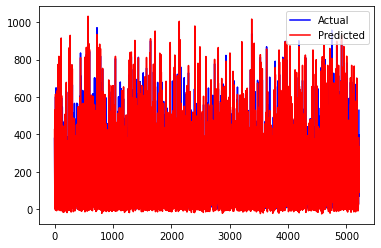

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(TestingDataResults.index, TestingDataResults.cnt, label = "Actual",color='b')
plt.plot(TestingDataResults.index, TestingDataResults.Predictedcnt, label = "Predicted",color='r')
plt.legend()
plt.show()

### Checking assumptions

In [35]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

####  Linearity assumption

In [36]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    df_results = calculate_residuals(model, features, label)
    
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


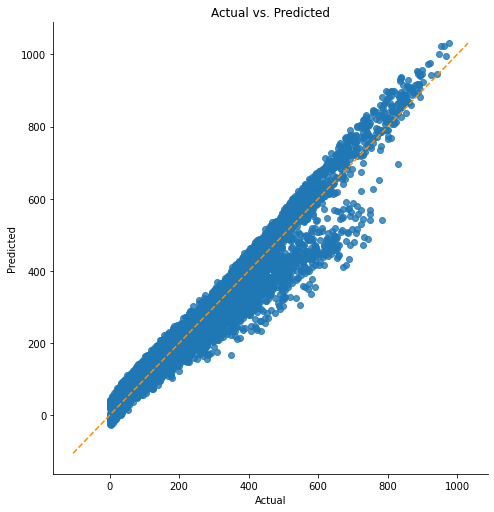

In [37]:
linear_assumption(LREG, X_train, y_train)

####  Normality of the Error Terms

In [38]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


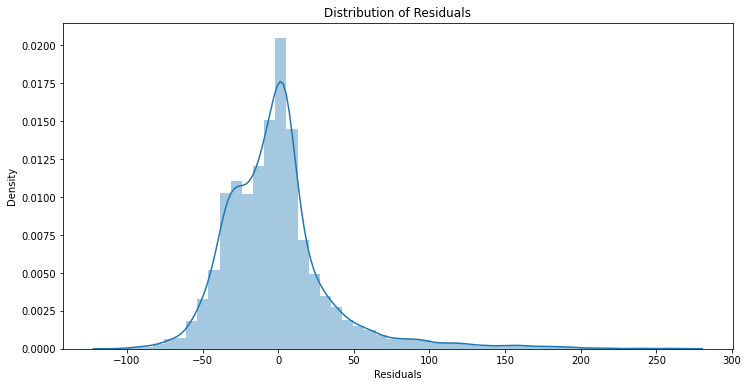


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [39]:
normal_errors_assumption(LREG, X_train, y_train)

This isn’t ideal, and we can see that our model is biasing towards under-estimating.

#### No Multicollinearity among PredictorsPermalink

In [40]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


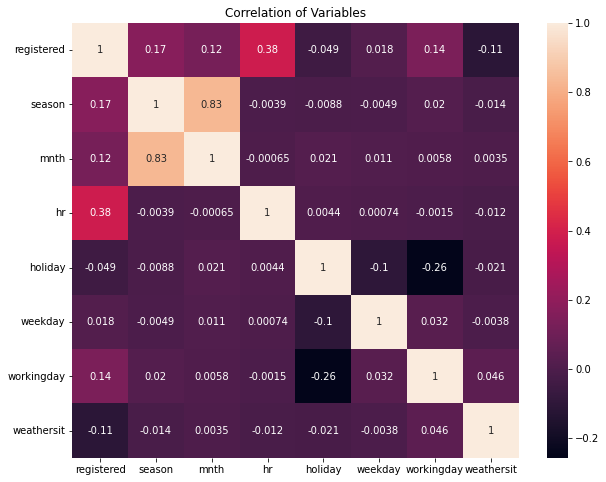

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
registered: 2.552553936128464
season: 18.102987221369457
mnth: 14.797891480473858
hr: 3.872692906611769
holiday: 1.0839907605058081
weekday: 2.863382018711318
workingday: 3.088146344140479
weathersit: 4.481478814865191

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [41]:
Predictors=['registered', 'season', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit']
multicollinearity_assumption(LREG, X_train, y_train,Predictors)

####  No Autocorrelation of the Error TermsPermalink

In [42]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [43]:
autocorrelation_assumption(LREG, X_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0104978976033774
Little to no autocorrelation 

Assumption satisfied


####  Homoscedasticity

In [44]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        

    df_results = calculate_residuals(model, features, label)

    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)  
    plt.title('Residuals')
    plt.show()

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


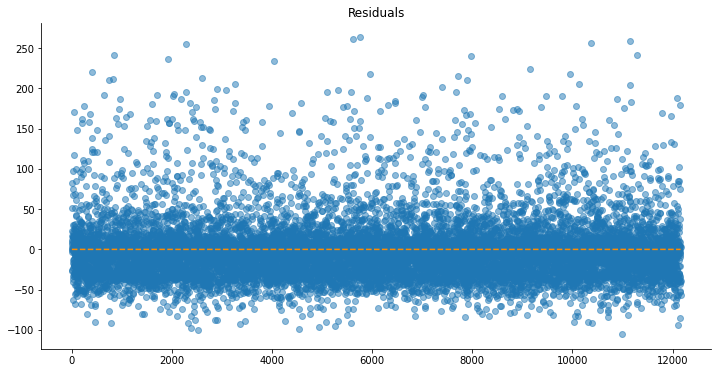

In [45]:
homoscedasticity_assumption(LREG, X_train, y_train)

###  Decision Tree

DecisionTreeRegressor(criterion='mse', max_depth=8)
R2 Value: 0.9856966133496459

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  379         401.0
1  237         265.0
2  343         296.0
3  181         173.0
4   98          95.0
Mean Accuracy on test data: 89.34182902379142
Median Accuracy on test data: 92.63931888544892


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:


Accuracy values for 10-fold Cross Validation:
 [85.30926586 87.35805715 89.17724362 89.77360446 85.38453019 82.95362201
 89.22993908 90.87176947 90.1461409  86.43321723]

Final Average Accuracy of the model: 87.66


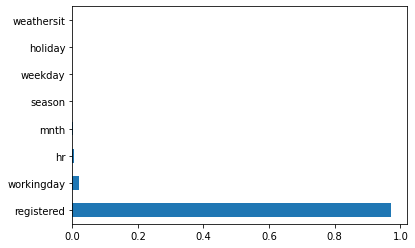

In [46]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=8,criterion='mse')


print(RegModel)

DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Random Forest

RandomForestRegressor(criterion='mse', max_depth=10)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


R2 Value: 0.9929689817647736

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  379         396.0
1  237         228.0
2  343         320.0
3  181         161.0
4   98          93.0
Mean Accuracy on test data: 91.03514053489005
Median Accuracy on test data: 94.4954128440367


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensem


Accuracy values for 10-fold Cross Validation:
 [87.54636123 88.22747589 90.90877445 91.12550203 88.02068678 84.66611925
 89.76552327 92.56169424 92.05455743 88.64904663]

Final Average Accuracy of the model: 89.35


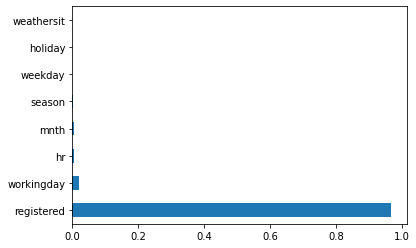

In [47]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=10, n_estimators=100,criterion='mse')

print(RegModel)

RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### 17. AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9947991739460608

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  379         394.0
1  237         224.0
2  343         322.0
3  181         158.0
4   98          89.0
Mean Accuracy on test data: 91.34973420534618
Median Accuracy on test data: 94.73684210526316

Accuracy values for 10-fold Cross Validation:
 [88.24513246 88.50347271 90.87248641 91.29080842 88.0936855  84.71136621
 90.06686514 92.60505442 92.06284969 88.79228126]

Final Average Accuracy of the model: 89.52


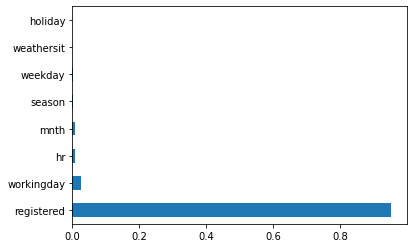

In [48]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

print(RegModel)

AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### XGBOOST

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=None)
[15:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9981839149578403

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcn

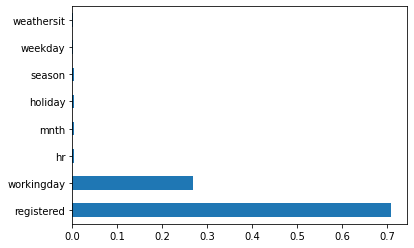

In [49]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')
print(RegModel)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

###  kNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=2)

print(RegModel)

KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) 
print('Median Accuracy on test data:', MedianAccuracy)
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)


from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=2)
R2 Value: 0.9922764731062145

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  379         398.0
1  237         222.0
2  343         340.0
3  181         162.0
4   98          93.0
Mean Accuracy on test data: 88.80294951178674
Median Accuracy on test data: 93.76518926479588

Accuracy values for 10-fold Cross Validation:
 [85.53767497 85.96869503 88.71863504 88.02509773 85.78291551 85.9313103
 86.81193904 90.09883641 90.33514314 88.53257834]

Final Average Accuracy of the model: 87.57


###  Deployment

Multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing XGBOOST as the final model since it is producing the best accuracy on this data.



#### Choosing only the most important variables

In this data, the most important predictor variables are 'registered', 'mnth', 'hr', and 'weekday'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [51]:
TargetVariable='cnt'
Predictors=['registered', 'mnth', 'hr', 'weekday']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

print(X.shape)
print(y.shape)

(17377, 4)
(17377,)


In [52]:
from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

[15:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:18

In [53]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

[15:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
import pickle
import os

with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

#### Step 3. Create a python function

In [55]:
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    InputData=pd.get_dummies(InputData)
            
    Predictors=['registered', 'mnth', 'hr', 'weekday']
    
    X=InputData[Predictors].values[0:Num_Inputs]
    
    
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        fileReadStream.close()
            
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [56]:
NewSampleData=pd.DataFrame(
data=[[32,1,1,6],
     [32,1,1,4]],
columns=['registered', 'mnth', 'hr', 'weekday'])

print(NewSampleData)
FunctionPredictResult(InputData= NewSampleData)

   registered  mnth  hr  weekday
0          32     1   1        6
1          32     1   1        4


,Prediction
0,39.0
1,39.0
